In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
fuel_econ = pd.read_csv('fuel_econ.csv')
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


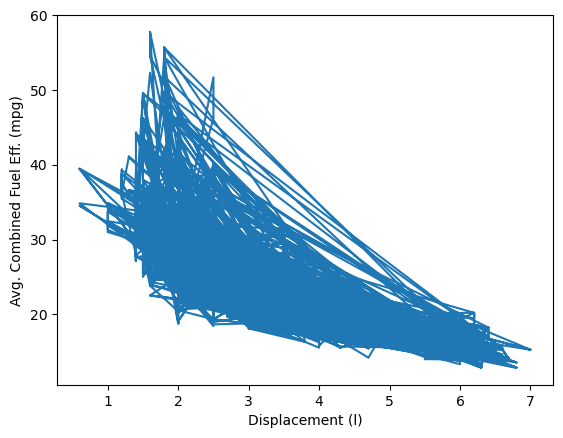

In [6]:
plt.errorbar(data = fuel_econ, x = 'displ', y = 'comb');
plt.xlabel('Displacement (l)');
plt.ylabel('Avg. Combined Fuel Eff. (mpg)');
# it is connecting each pair of x and y pair as they appear in the data, without any sorting
# it is just a scatterplot with connecting lines


In [23]:
# now we need to sort all the data according to x variable and need to have one point for each x value
# first we need to set bin edges and bin centres to summarizing the data on the displacement values
bins_e = np.arange(0.6, 7+0.2, 0.2)
bins_c = bins_e[:-1]+0.1
# centre points are needed so that the points are plotted at there accurate position
# last value is removed as it dont actually corresponds to actual bin centre


displ_binned = pd.cut(fuel_econ['displ'], bins = bins_e, include_lowest = True)
# panda cut function to figure out which bin each data point should be used in
# first argument is the series we are slicing
# second argument is the set of bins
# third argument make sures the values that are equal to min get included


comb_mean = fuel_econ['comb'].groupby(displ_binned).mean()

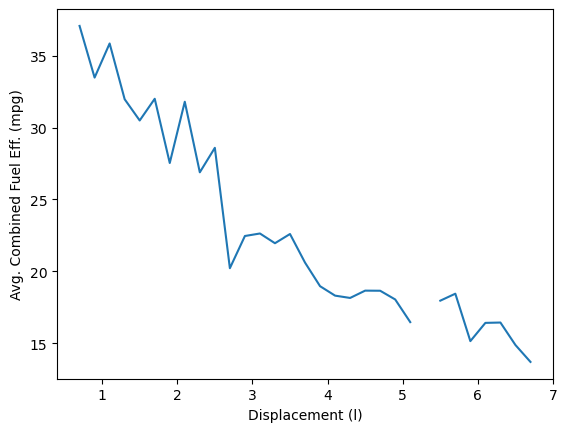

In [22]:
plt.errorbar(x = bins_c, y = comb_mean);
plt.xlabel('Displacement (l)');
plt.ylabel('Avg. Combined Fuel Eff. (mpg)');